In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7.0,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,7.0,NaN,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,NaN,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,NaN,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4.0,10.0,7.0,8.0,12.0,NaN,9.0,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,NaN,10.0,12.0,6.0,8.0,1.0,9.0,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,NaN,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0.0,NaN,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1250
float64		column 2	500
float64		column 3	1000
float64		column 4	1750
float64		column 5	500
float64		column 6	250
float64		column 7	2000
float64		column 8	1500
float64		column 9	1000
float64		column 10	500
float64		column 11	750
float64		column 12	1500
float64		column 13	750
float64		column 14	1250
float64		column 15	750
float64		column 16	750
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,18750.000000,19500.000000,19000.000000,18250.000000,19500.000000,19750.000000,18000.000000,18500.000000,19000.000000,19500.000000,19250.000000,18500.000000,19250.000000,18750.000000,19250.000000,19250.000000,0.0
mean,4.020907,7.034872,5.124000,5.381699,3.503795,6.901063,7.473722,4.610054,5.177789,8.278769,6.440987,7.931676,3.045247,8.330240,3.683117,7.802805,NaN
std,1.876896,3.283518,1.985232,2.200173,2.182159,2.015192,2.235553,2.634407,2.340006,2.474969,2.592879,2.028736,2.311967,1.510275,2.535600,1.593493,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

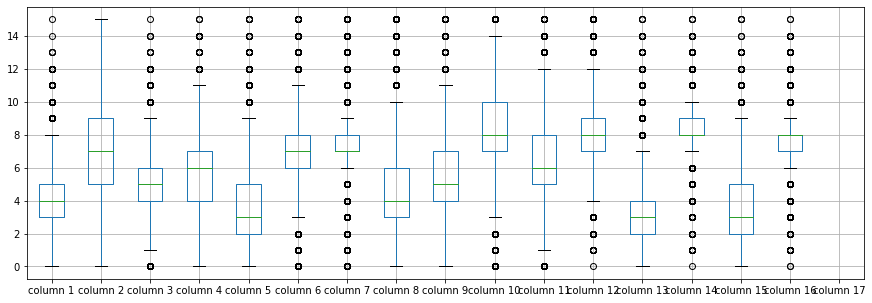

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.020907
column 2     7.034872
column 3     5.124000
column 4     5.381699
column 5     3.503795
column 6     6.901063
column 7     7.473722
column 8     4.610054
column 9     5.177789
column 10    8.278769
column 11    6.440987
column 12    7.931676
column 13    3.045247
column 14    8.330240
column 15    3.683117
column 16    7.802805
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.750897,0.844721,0.660996,0.612475,-0.031586,0.043095,0.011932,0.049733,0.150110,0.033742,-0.051923,0.476733,0.098387,0.267153,-0.100286,NaN
column 2,0.750897,1.000000,0.664805,0.815557,0.549679,0.041698,-0.036975,-0.026746,0.091054,0.159819,-0.054097,-0.008917,0.272690,-0.001615,0.224999,-0.042700,NaN
column 3,0.844721,0.664805,1.000000,0.645713,0.759577,0.058448,0.027504,-0.097113,0.056305,0.115558,0.016227,-0.044156,0.547956,0.044433,0.250486,-0.114431,NaN
column 4,0.660996,0.815557,0.645713,1.000000,0.633484,0.043340,-0.021683,0.081782,0.054376,0.016471,-0.010984,0.022934,0.253975,0.021815,0.284410,-0.016228,NaN
column 5,0.612475,0.549679,0.759577,0.633484,1.000000,0.137658,-0.025908,-0.009366,-0.065181,-0.066520,-0.068869,-0.039671,0.623264,0.016608,0.484029,-0.061684,NaN
column 6,-0.031586,0.041698,0.058448,0.043340,0.137658,1.000000,-0.355078,-0.054452,-0.118440,0.084101,-0.346385,-0.026621,0.144644,-0.246453,0.126052,0.249011,NaN
column 7,0.043095,-0.036975,0.027504,-0.021683,-0.025908,-0.355078,1.000000,-0.102236,-0.050738,0.170442,0.585840,-0.257155,-0.030395,0.539497,-0.072624,-0.196021,NaN
column 8,0.011932,-0.026746,-0.097113,0.081782,-0.009366,-0.054452,-0.102236,1.000000,-0.182719,-0.316172,0.039473,0.076012,0.137534,-0.076537,0.014749,0.178635,NaN
column 9,0.049733,0.091054,0.056305,0.054376,-0.065181,-0.118440,-0.050738,-0.182719,1.000000,0.131141,-0.054355,0.112339,-0.378712,-0.053397,0.267721,-0.057576,NaN
column 10,0.150110,0.159819,0.115558,0.016471,-0.066520,0.084101,0.170442,-0.316172,0.131141,1.000000,0.055806,-0.104997,-0.173560,0.028859,-0.086206,-0.112485,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+10,17+10+10,17+10+10+10,17+10+10,17+10,17], vae_layer = False, seed = 100)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 70.82696950378418
Epoch: 1 , loss: 46.63001628417969
Epoch: 2 , loss: 43.69199598693848
Epoch: 3 , loss: 42.26237998199463
Epoch: 4 , loss: 41.31304068145752
Epoch: 5 , loss: 41.0038696899414
Epoch: 6 , loss: 40.47520720214844
Epoch: 7 , loss: 40.35896731262207
Epoch: 8 , loss: 39.86059997406006
Epoch: 9 , loss: 39.88389691925049
Epoch: 10 , loss: 39.66421263122559
Epoch: 11 , loss: 39.63063186798096
Epoch: 12 , loss: 39.39586626586914
Epoch: 13 , loss: 39.40363969268799
Epoch: 14 , loss: 39.166190838623045
Epoch: 15 , loss: 39.13374825286865
Epoch: 16 , loss: 39.07178045654297
Epoch: 17 , loss: 38.98065294036865
Epoch: 18 , loss: 38.94172865142822
Epoch: 19 , loss: 38.98114051208496
Epoch: 20 , loss: 38.75213268432617
Epoch: 21 , loss: 38.84270381164551
Epoch: 22 , loss: 38.6816935470581
Epoch: 23 , loss: 38.822138278198246
Epoch: 24 , loss: 38.750559197998044
Epoch: 25 , loss: 38.7087681350708
Epoch:

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.002626
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,NaN
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,-4.096811,NaN
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,-2.238952,0.000000,NaN
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,NaN
4,0.0,0.0,-2.209739,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,-5.34674,0.000000,0.0,0.0,0.000000,0.000000,NaN
19996,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,1.89545,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,NaN
19997,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,2.731836,0.0,0.0,0.000000,0.000000,NaN
19998,0.0,0.0,0.000000,0.0,0.0,0.0,3.23277,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

393.86293717200016

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.1054853516325221

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      9.975512
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.006905
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.000000,3.0,2.0,7.0,8.00000,2.00000,9.0,11.0,7.00000,7.000000,1.0,8.0,5.000000,6.000000,-0.005426
1,4.0,7.0,5.000000,5.0,5.0,5.0,9.00000,6.00000,4.0,8.0,7.00000,9.000000,2.0,9.0,7.000000,5.903189,-0.000195
2,7.0,10.0,8.000000,7.0,4.0,8.0,8.00000,5.00000,10.0,11.0,2.00000,8.000000,2.0,5.0,2.761048,10.000000,-0.002724
3,4.0,9.0,5.000000,7.0,4.0,7.0,7.00000,13.00000,1.0,7.0,6.00000,8.000000,3.0,8.0,0.000000,8.000000,-0.001225
4,6.0,7.0,5.790261,5.0,4.0,7.0,6.00000,3.00000,7.0,10.0,7.00000,9.000000,3.0,8.0,3.000000,7.000000,-0.010408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.000000,8.0,3.0,4.0,10.00000,7.00000,8.0,12.0,4.65326,9.000000,2.0,9.0,2.000000,6.000000,-0.000457
19996,4.0,7.0,6.000000,5.0,3.0,7.0,8.00000,3.89545,10.0,12.0,6.00000,8.000000,1.0,9.0,6.000000,8.000000,0.000683
19997,4.0,8.0,4.000000,6.0,4.0,7.0,8.00000,7.00000,4.0,10.0,7.00000,8.731836,3.0,9.0,3.000000,7.000000,-0.003055
19998,4.0,11.0,4.000000,8.0,3.0,0.0,5.23277,4.00000,6.0,1.0,0.00000,7.000000,0.0,8.0,0.000000,8.000000,-0.003047


In [21]:
imputations[-1].to_excel("Letter_NW_5(imp).xlsx", index=False, header=False)